# Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'


## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn
import sklearn
color = sns.color_palette()
import sklearn.metrics as mertics
import scipy.stats as stats
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


## Fixing messy column names (containing spaces)

In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [5]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


## Check the counts of unique rows in df

In [6]:
df.dtypes.value_counts()

float64    63
int64       3
object      1
dtype: int64


## Check the number of rows (observations) & number of columns (variables)

In [7]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


# Checking datatype of all columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

## check the basic measures of descriptive statistics for the continuous variables

In [9]:
pd.options.display.float_format = '{:.2f}'.format 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.00,603.89,10636.76,0.00,8.00,49.00,106.00,514721.00
Creditors_Velocity_Days,3586.00,2057.85,54169.48,0.00,8.00,39.00,89.00,2034145.00
Inventory_Velocity_Days,3483.00,79.64,137.85,-199.00,0.00,35.00,96.00,996.00
Value_of_Output_by_Total_Assets,3586.00,0.82,1.20,-0.33,0.07,0.48,1.16,17.63


## Check for duplicate data


In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block


# Criteria

## 1.1 Outlier Treatment

In [11]:
df1 = df.drop(['Co_Code', 'Co_Name'], axis = 1)

In [12]:
df1.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


In [13]:
df1.shape

(3586, 65)

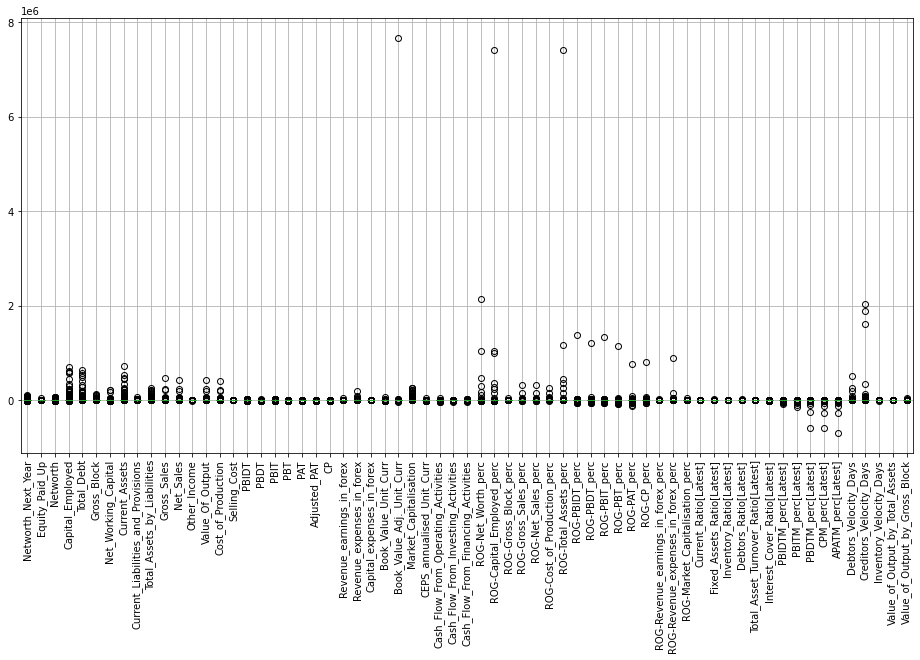

In [14]:
#  Checking Outliers in dataset
df1.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

In [15]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.

def mod_outlier(df1):
    df1 = df1._get_numeric_data()
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for col in df1.columns:
        for i in range(0,len(df1[col])):
            if df1[col][i] < lower_bound[col]:
                df1[col][i] = lower_bound[col]
                
            if df1[col][i] > upper_bound[col]:
                    df1[col][i] = upper_bound[col]
    for col in df1.columns:
        return(df1)

In [16]:
df2 = mod_outlier(df1)

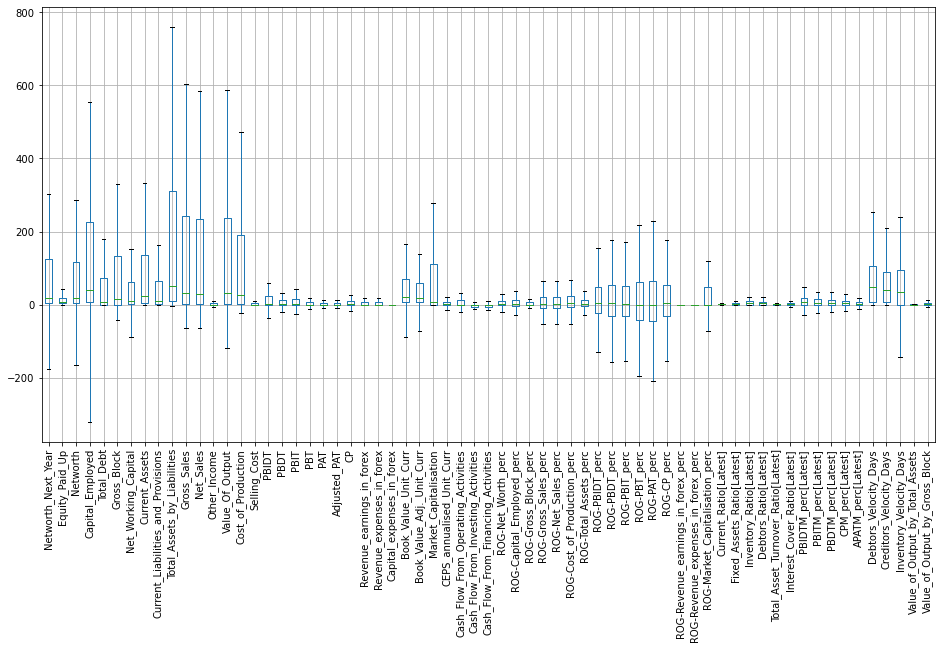

In [17]:
# Checking Outliers in dataset
df2.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

## 1.2 Missing Value Treatment

In [18]:
df2.isnull().sum().sort_values(ascending=False).head(13)

Inventory_Velocity_Days               103
Book_Value_Adj._Unit_Curr               4
Debtors_Ratio[Latest]                   1
Interest_Cover_Ratio[Latest]            1
Current_Ratio[Latest]                   1
Fixed_Assets_Ratio[Latest]              1
Inventory_Ratio[Latest]                 1
Total_Asset_Turnover_Ratio[Latest]      1
PBIDTM_perc[Latest]                     1
PBITM_perc[Latest]                      1
PBDTM_perc[Latest]                      1
CPM_perc[Latest]                        1
APATM_perc[Latest]                      1
dtype: int64

In [19]:
df2.isnull().sum().sum()

118

In [20]:
df2.size

233090

we can observe 0.05% missing values in the dataset

In [21]:
#Columns with missing values
print(np.where(df2.isnull().sum()>0))


(array([27, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62], dtype=int64),)


In [22]:
# Treating Missing value
df2.fillna(df.median())

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-21.43,-21.16,-17.09,-11.12,29,101,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,-17.09,-11.12,97,210,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-21.16,-17.09,-11.12,93,63,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,28.48,18.52,253,210,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,303.53,43.17,287.41,555.11,180.83,328.88,0.00,332.19,163.03,760.52,...,0.00,0.00,0.00,0.00,0.00,0,0,35.00,0.60,7.76
3582,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,39.92,32.17,29.81,28.48,18.52,13,53,77.00,0.29,1.00
3583,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [23]:
df2.isnull().any().any()

True

Still we can observe the misssing value.

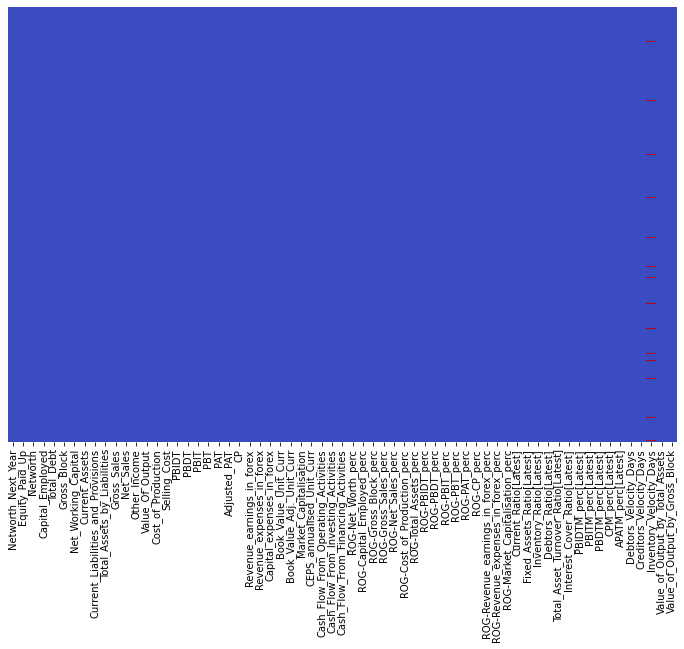

In [24]:
# Let's visually inspect the missing values in our data
plt.figure(figsize = (12,8))
sns.heatmap(df2.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [25]:
cat=[]
num=[]
for i in df2.columns:
    if df2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Current_Assets', 'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc', 'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc', 'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc', 'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc', 'ROG-PBIDT_perc', 'ROG-PBDT_perc', 'ROG-PBIT_perc', 'ROG-PBT_perc', 'ROG-PAT_perc', 'ROG-CP_perc', 'ROG-Revenue_earnings_in_forex_perc'

In [26]:
# Lets treat these missing values with median 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df2 = pd.DataFrame(imputer.fit_transform(df2))
df2.columns=num

In [27]:
# df2 =df_fra[cat]
df2.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-21.43,-21.16,-17.09,-11.12,29.00,101.00,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,-17.09,-11.12,97.00,210.00,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-21.16,-17.09,-11.12,93.00,63.00,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,28.48,18.52,253.00,210.00,0.00,0.01,0.05


In [28]:
df2.isnull().any().any()

False

In [29]:
df2.isnull().sum().sort_values(ascending=False).head(20)

Value_of_Output_by_Gross_Block         0
Cash_Flow_From_Investing_Activities    0
CEPS_annualised_Unit_Curr              0
Market_Capitalisation                  0
Book_Value_Adj._Unit_Curr              0
Book_Value_Unit_Curr                   0
Capital_expenses_in_forex              0
Revenue_expenses_in_forex              0
Revenue_earnings_in_forex              0
CP                                     0
Adjusted_PAT                           0
PAT                                    0
PBT                                    0
PBIT                                   0
PBDT                                   0
PBIDT                                  0
Selling_Cost                           0
Cost_of_Production                     0
Value_Of_Output                        0
Other_Income                           0
dtype: int64

## 1.3 Transform Target variable into 0 and 1

In [30]:
df2['default'] = np.where((df2['Networth_Next_Year'] > 0), 0, 1)

In [31]:
# Checking top 5 rows
df2[['default','Networth_Next_Year']].head(5)

,default,Networth_Next_Year
0,1,-175.74
1,1,-175.74
2,1,-175.74
3,1,-175.74
4,1,-175.74


In [32]:
# Checking tail 5 rows
df2[['default','Networth_Next_Year']].tail(5)

,default,Networth_Next_Year
3581,0,303.53
3582,0,303.53
3583,0,303.53
3584,0,303.53
3585,0,303.53


In [33]:
# How does the variable 'default' look like
df2['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [34]:
# Checking proportion of default
df2['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

## 1.4 Univariate & Bivariate analysis with proper interpretation.

### Univariate Analysis

In [35]:
pd.options.display.float_format = '{:.2f}'.format 
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,3586.00,77.40,120.48,-175.74,3.98,19.02,123.80,303.53
Equity_Paid_Up,3586.00,13.99,14.00,0.00,3.75,8.29,19.52,43.17
Networth,3586.00,73.69,112.94,-166.22,3.89,18.58,117.30,287.41
Capital_Employed,3586.00,152.49,207.87,-320.90,7.60,39.09,226.60,555.11
Total_Debt,3586.00,47.44,68.22,-0.72,0.03,7.49,72.35,180.83
...,...,...,...,...,...,...,...,...
Creditors_Velocity_Days,3586.00,62.39,68.03,0.00,8.00,39.00,89.00,210.00
Inventory_Velocity_Days,3586.00,61.22,73.20,-144.00,0.00,35.00,93.00,240.00
Value_of_Output_by_Total_Assets,3586.00,0.73,0.77,-0.33,0.07,0.48,1.16,2.79
Value_of_Output_by_Gross_Block,3586.00,3.36,4.10,-6.69,0.27,1.53,4.91,11.87


Text(0.5, 1.0, 'Figure:Boxplot of few important features')

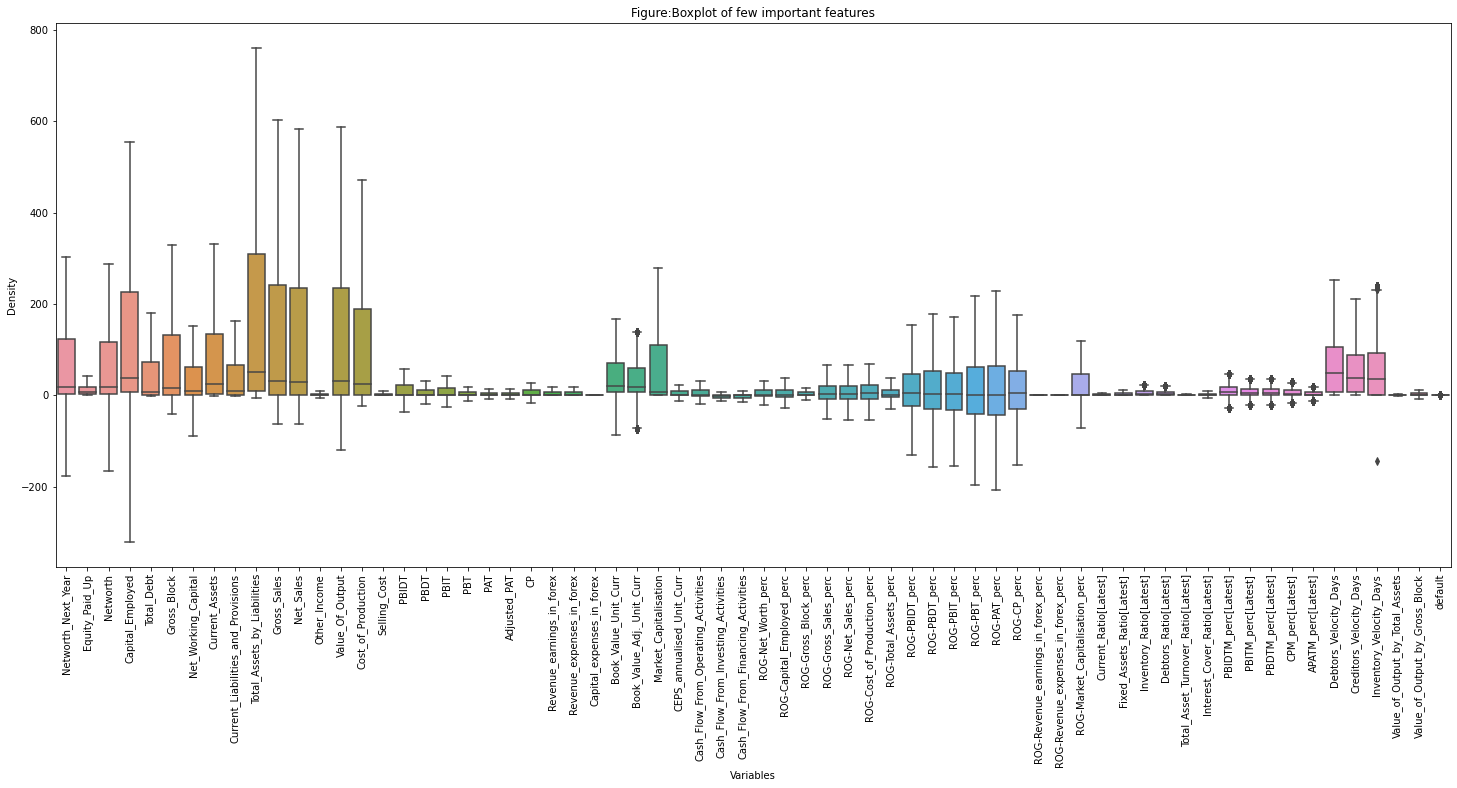

In [36]:
# Boxplot Analysis :
plt.figure(figsize=(25,10))
sns.boxplot(data=df2)
plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Density")
plt.title('Figure:Boxplot of few important features')

Variable 'Total_Asset_To_Liabilities still have some extreme values.

Varible 'Capital_Employes'still have some Extreme and Lower values.

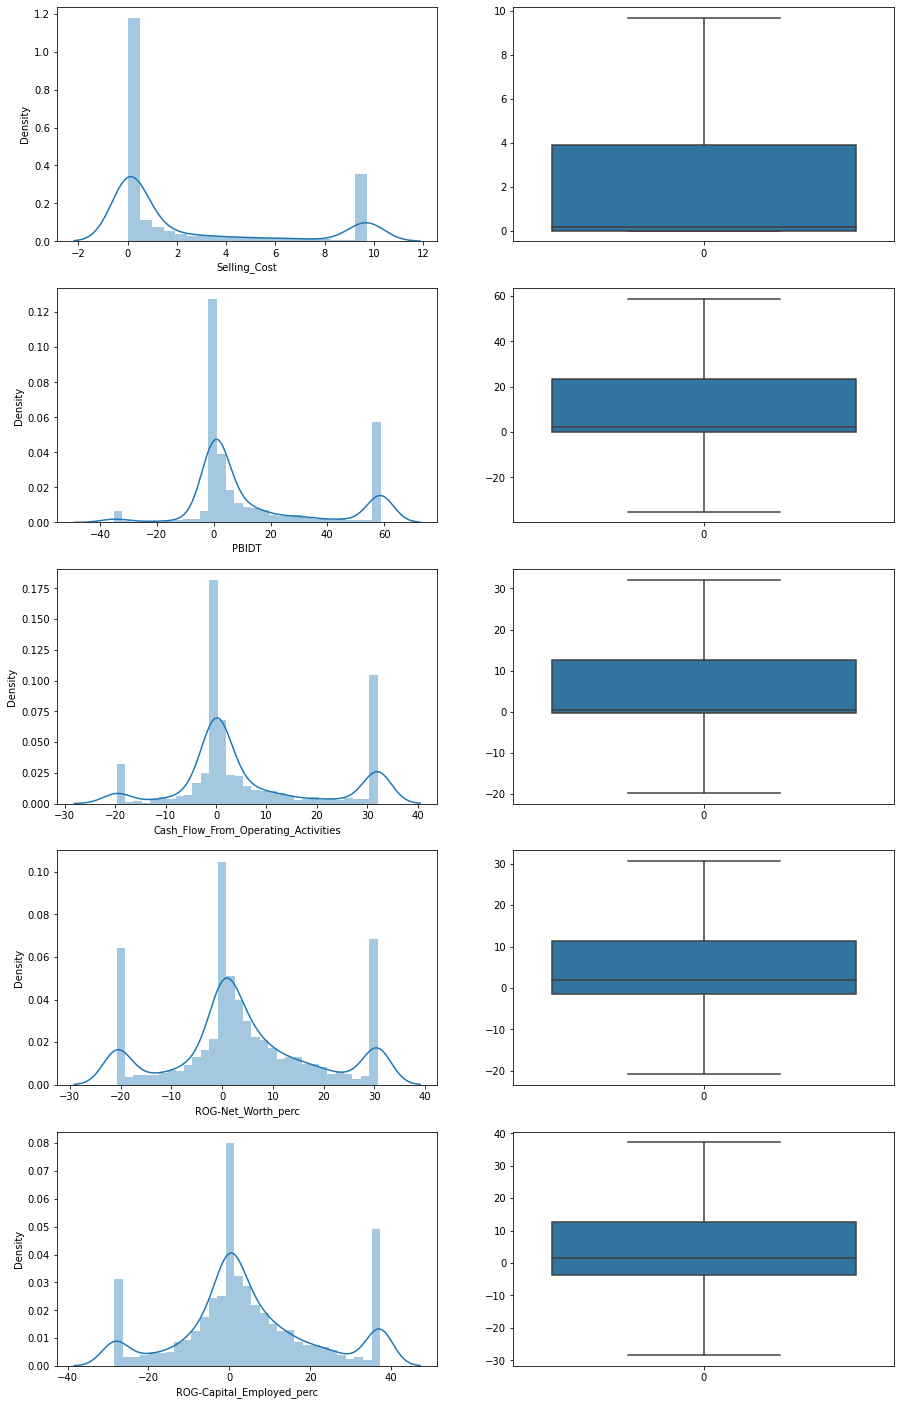

In [37]:
# 15 Significate Scaled Feature Variables - Distribution of column with Displot & Box plot :

fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(15,25)

sns.distplot(df2['Selling_Cost'], ax= axes[0][0])
sns.boxplot(df2['Selling_Cost'],orient = 'H', ax= axes[0][1])

sns.distplot(df2['PBIDT'], ax= axes[1][0])
sns.boxplot(df2['PBIDT'],orient = 'H', ax= axes[1][1])

sns.distplot(df2['Cash_Flow_From_Operating_Activities'], ax= axes[2][0])
sns.boxplot(df2['Cash_Flow_From_Operating_Activities'],orient = 'H', ax= axes[2][1])

sns.distplot(df2['ROG-Net_Worth_perc'], ax= axes[3][0])
sns.boxplot(df2['ROG-Net_Worth_perc'],orient = 'H', ax= axes[3][1])

sns.distplot(df2['ROG-Capital_Employed_perc'], ax= axes[4][0])
sns.boxplot(df2['ROG-Capital_Employed_perc'],orient = 'H', ax= axes[4][1])

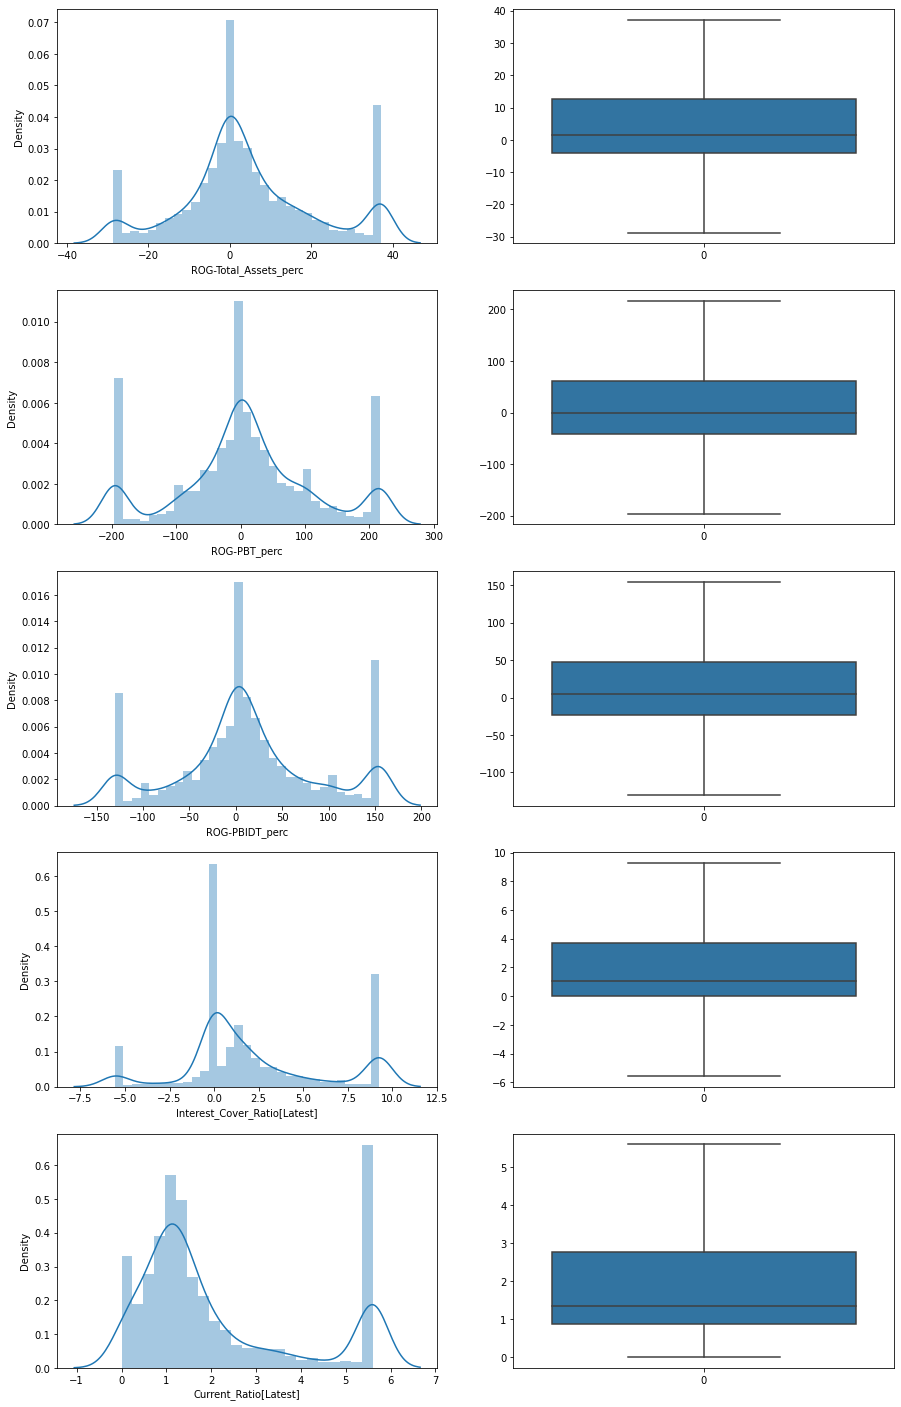

In [38]:
fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(15,25)

sns.distplot(df2['ROG-Total_Assets_perc'], ax= axes[0][0])
sns.boxplot(df2['ROG-Total_Assets_perc'],orient = 'H', ax= axes[0][1])

sns.distplot(df2['ROG-PBT_perc'], ax= axes[1][0])
sns.boxplot(df2['ROG-PBT_perc'],orient = 'H', ax= axes[1][1])

sns.distplot(df2['ROG-PBIDT_perc'], ax= axes[2][0])
sns.boxplot(df2['ROG-PBIDT_perc'],orient = 'H', ax= axes[2][1])

sns.distplot(df2['Interest_Cover_Ratio[Latest]'], ax= axes[3][0])
sns.boxplot(df2['Interest_Cover_Ratio[Latest]'],orient = 'H', ax= axes[3][1])

sns.distplot(df2['Current_Ratio[Latest]'], ax= axes[4][0])
sns.boxplot(df2['Current_Ratio[Latest]'],orient = 'H', ax= axes[4][1])

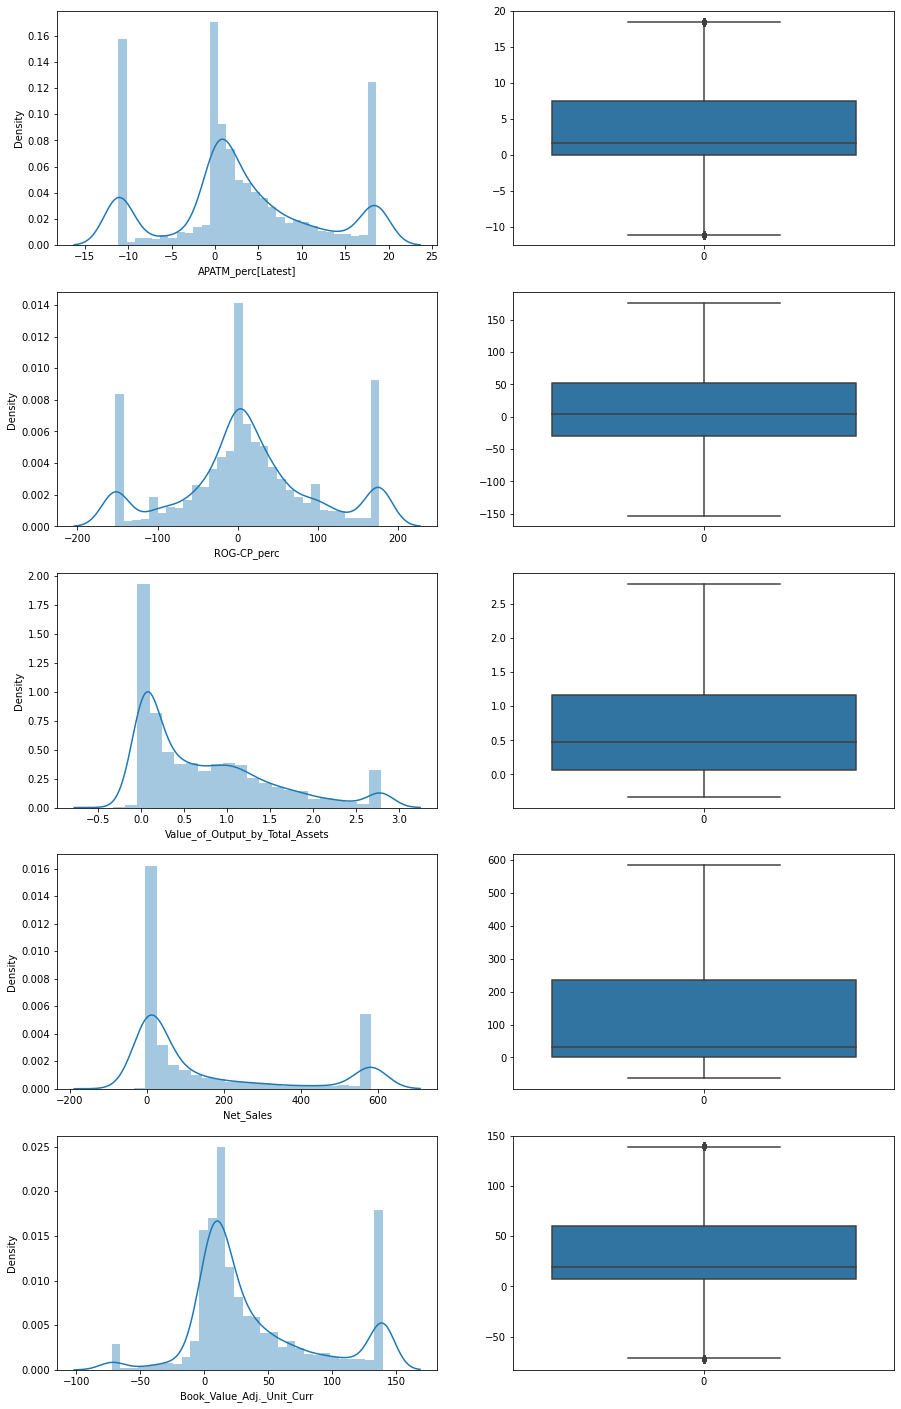

In [39]:
fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(15,25)

sns.distplot(df2['APATM_perc[Latest]'], ax= axes[0][0])
sns.boxplot(df2['APATM_perc[Latest]'],orient = 'H', ax= axes[0][1])

sns.distplot(df2['ROG-CP_perc'], ax= axes[1][0])
sns.boxplot(df2['ROG-CP_perc'],orient = 'H', ax= axes[1][1])

sns.distplot(df2['Value_of_Output_by_Total_Assets'], ax= axes[2][0])
sns.boxplot(df2['Value_of_Output_by_Total_Assets'],orient = 'H', ax= axes[2][1])

sns.distplot(df2['Net_Sales'], ax= axes[3][0])
sns.boxplot(df2['Net_Sales'],orient = 'H', ax= axes[3][1])

sns.distplot(df2['Book_Value_Adj._Unit_Curr'], ax= axes[4][0])
sns.boxplot(df2['Book_Value_Adj._Unit_Curr'],orient = 'H', ax= axes[4][1])

In [40]:
sns.catplot('default', data = df2, kind = 'count',aspect = 1.5, palette = 'mako')
plt.title("Figure: Countplot of Target Variable Default")

TypeError: catplot() got multiple values for argument 'data'

###  Bivariate Analysis 

In [ ]:
# (Gross Sales Vs Net Sales)

sns.jointplot(x = df2['Gross_Sales'],
y = df2['Net_Sales'])

IN this exists linear relationship between these two important variables.

In [ ]:
# Networth Vs Capital Employment
sns.jointplot(x = df2['Networth'],
y = df1['Capital_Employed'])

As the capital increases, net worth also increases. But in some cases capital seems to be disbursed even
for lesser networth

In [ ]:
# Networth Vs Cost of Production
sns.jointplot(x = df2['Networth'],
y = df1['Cost_of_Production'])

In this plot is scattered and there exists no such relationship between these two variables.

In [ ]:
# Default vs ROG-Net_Worth_perc
sns.boxplot(x = df2['default'],
y = df1['ROG-Net_Worth_perc'])

In [ ]:
# As per Regression Feature Elimination(RFE) 
df_imp =pd.DataFrame(df2,columns=['Net_Sales','Value_Of_Output', 'PBIDT', 'PBDT', 'PBIT', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
                                     'ROG-Net_Worth_perc', 'ROG-Capital_Employed_perc', 'ROG-Total_Assets_perc', 'Current_Ratio[Latest]', 'Fixed_Assets_Ratio[Latest]',
                                     'Inventory_Ratio[Latest]', 'Total_Asset_Turnover_Ratio[Latest]', 'Interest_Cover_Ratio[Latest]', 'APATM_perc[Latest]', 'Values_of_Output_to_Total_Assests',
                                     'Value_of_Output_to_Gross_Block', 'default'])

In [ ]:
# Correlation Heatmap
plt.figure(figsize = (12,8))
cor_matrix = df_imp.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

# 1.5 Train Test Split

1. Split the data into Train and Test dataset in a ratio of 67:33 and use random_state = 42.
2. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset

In [43]:
X = df2.drop(['default','Networth_Next_Year'], axis=1)
y = df2['default']

In [ ]:
X.head()

In [ ]:
y.head()

In [44]:
#Split X and y into training and test set in 67:33 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=df2['default'])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
scaled_predictors = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [46]:
df3 = pd.concat([scaled_predictors, y], axis = 1)

In [47]:
# we are scaling the data for ANN. Without scaling it will give very poor results
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled.shape

(2402, 64)

In [ ]:
# scaled Train data first 5 rows
X_train.head()

In [ ]:
# scaled Test data first 5 rows
X_test.head()

In [ ]:
X_train.columns

In [ ]:
y_train.value_counts(1)

In [ ]:
y_test.value_counts(1)

In [ ]:
#Number of rows and columns of the training set for the independent variables: 
X_train.shape[0]

In [ ]:
#Number of rows and columns of the test set for the independent variables: 
X_test.shape[0]

## 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff.

### The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
y =  11+𝑒−𝑧, where z =  𝛽0  + ∑𝑛𝑖=1(𝛽𝑖𝑋1)
    

Now, Importing statsmodels modules

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as SM

In [49]:
# For modeling we will use Logistic Regression with recursive feature elimination

LogR = LogisticRegression()

In [50]:
selector = RFE(estimator = LogR, n_features_to_select=21, step=1)

In [51]:
selector = selector.fit(X_train, y_train)

In [52]:
selector.n_features_

21

In [53]:
selector.ranking_

array([ 3, 33, 11,  6, 35, 13, 14, 24, 19,  9,  1, 17,  1, 12, 21,  2,  1,
        1, 23, 26, 36, 18,  1,  1, 42,  1,  1, 16, 10, 34,  4, 20,  1,  1,
        1,  7,  8, 15,  1, 29, 27, 30, 41, 40, 31, 44, 43, 32,  1,  1,  1,
       37,  1,  1,  5,  1, 25, 28,  1, 22, 39, 38,  1,  1])

In [54]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
10,Net_Sales,1
12,Value_Of_Output,1
16,PBDT,1
17,PBIT,1
22,Revenue_earnings_in_forex,1
23,Revenue_expenses_in_forex,1
25,Book_Value_Unit_Curr,1
26,Book_Value_Adj._Unit_Curr,1
32,ROG-Net_Worth_perc,1
33,ROG-Capital_Employed_perc,1


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [57]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [58]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [60]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [61]:
best_model = grid_search.best_estimator_

In [62]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [63]:
# Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.42,0.58
1,1.00,0.00
2,1.00,0.00
3,0.99,0.01
4,1.00,0.00


## 1.7 Validate the Model on Test Dataset and state the performance matrices.

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.88      0.75      0.81       260

    accuracy                           0.96      2402
   macro avg       0.93      0.87      0.89      2402
weighted avg       0.96      0.96      0.96      2402
 



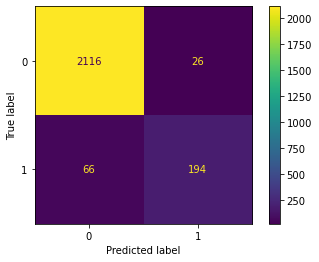

In [65]:
# Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.81      0.70      0.75       128

    accuracy                           0.95      1184
   macro avg       0.89      0.84      0.86      1184
weighted avg       0.95      0.95      0.95      1184
 



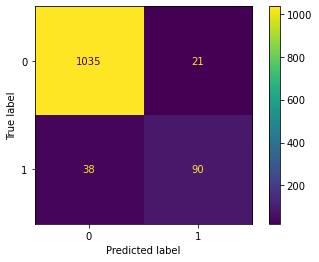

In [66]:
# Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

1. We can select other parameters to perform GridSearchCV and try optimize the desired parameter.
2. We see not good recall score for both train and test
3. Since only 11% of the total data had defaults, we will now try to balance the data before fiting the model.


In [70]:
# Imblearn over_sampling

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [71]:
X_res

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,Gross_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,3.25,3.49,3.54,0.05,1.53,2.94,2.98,0.05,3.59,0.42,...,40.00,30.00,35.27,28.48,18.52,0.00,0.00,0.00,0.11,0.26
1,4.75,5.29,5.39,0.02,0.75,3.56,3.62,0.06,5.45,1.88,...,-1.12,-6.16,-2.61,-2.61,-7.65,8.00,13.00,7.00,0.90,4.12
2,13.06,13.50,13.50,0.00,0.00,13.47,13.62,0.15,13.65,0.12,...,1.60,1.60,1.60,1.06,1.06,253.00,0.00,240.00,0.46,0.00
3,43.17,-60.79,-58.30,2.46,18.66,-84.10,7.69,91.79,33.49,0.76,...,-28.48,-21.43,-21.16,-17.09,-11.12,253.00,15.00,69.00,0.02,0.06
4,4.00,5.95,20.62,14.33,7.76,7.38,22.22,14.83,35.45,142.80,...,4.29,3.99,3.12,2.10,1.79,53.00,28.00,0.00,2.79,11.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,7.18,-0.69,0.72,1.39,8.18,-0.26,2.56,2.82,3.54,4.26,...,-4.61,-5.69,-4.91,-4.91,-6.00,46.88,23.44,46.88,0.79,0.35
4280,5.24,11.14,62.14,49.58,43.70,17.89,27.82,9.92,72.06,31.12,...,36.69,24.85,26.85,25.15,15.00,35.83,103.58,209.97,0.23,0.31
4281,10.33,-2.82,-2.34,0.00,1.71,-4.41,0.23,4.65,2.31,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4282,16.99,-82.68,317.22,180.83,169.77,151.52,285.80,101.05,422.80,341.79,...,-28.30,-21.43,-21.16,-17.09,-11.12,253.00,189.10,98.27,-0.02,-0.12


In [72]:
y_res

0       0
1       0
2       0
3       1
4       0
       ..
4279    1
4280    1
4281    1
4282    1
4283    1
Name: default, Length: 4284, dtype: int32